# U.S. Medical Insurance Costs

Import contents of csv file. 

In [37]:
import csv

file_path = 'insurance.csv'

# Read the csv file, skipping the first row to create a list of dictionaries that represent each row of data
with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)
    data_list = []
    for row in csv_reader:
        person_data = {
            'age': row['age'],
            'sex': row['sex'],
            'bmi': row['bmi'],
            'children': row['children'],
            'smoker': row['smoker'],
            'region': row['region'],
            'charges': row['charges']
        }
        data_list.append(person_data)

# Display the first few entries to verify
for entry in data_list[:5]:
    print(entry)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}


In [ ]:
Create a visual of the ages from data_list.

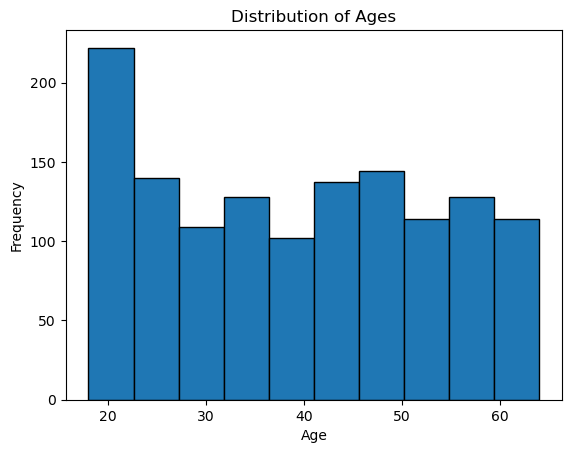

In [39]:
import matplotlib.pyplot as plt 

# Extract ages from data_list 
ages = [int(person['age']) for person in data_list] 

# Create a histogram 
plt.hist(ages, bins=10, edgecolor='black') 

# Add titles and labels 
plt.title('Distribution of Ages') 
plt.xlabel('Age') 
plt.ylabel('Frequency')

# Show the plot 
plt.show()

Calculate average age of people in this data set who are paying for health insurance.

In [41]:
# Calculate the average age 
total_age = sum(int(person['age']) for person in data_list) 
average_age = total_age / len(data_list) 

print(f'The average age is: {average_age:.2f}')

The average age is: 39.21


Create a visual of how insurance costs change based on age.

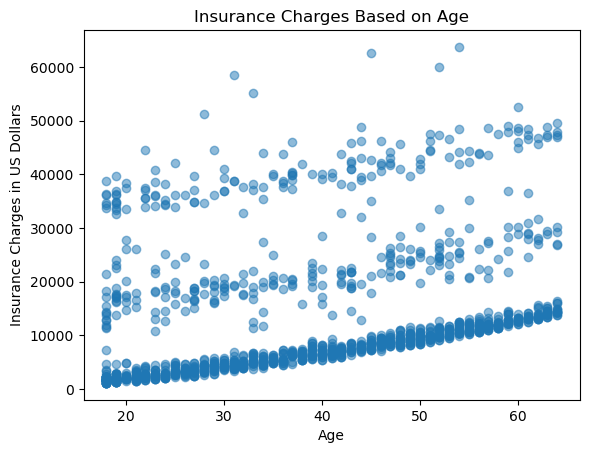

In [45]:
import matplotlib.pyplot as plt 

# Extract ages and charges from data_list 
ages = [int(person['age']) for person in data_list] 
charges = [float(person['charges']) for person in data_list] 

# Create a scatter plot 
plt.scatter(ages, charges, alpha=0.5) 

# Add titles and labels 
plt.title('Insurance Charges Based on Age') 
plt.xlabel('Age') 
plt.ylabel('Insurance Charges in US Dollars') 

# Show the plot 
plt.show()

Now...same scatter plot, but the spots are color coded red for females and blue for males.

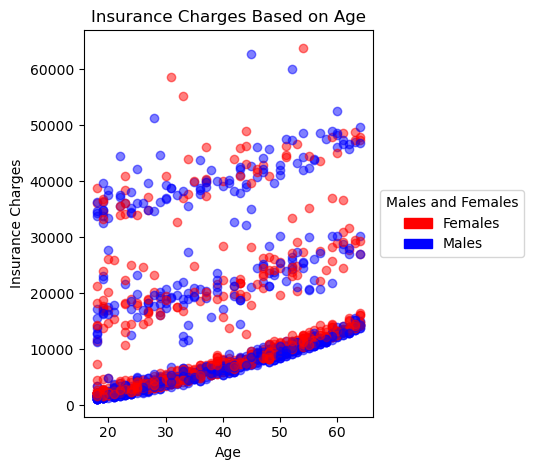

In [59]:
import matplotlib.pyplot as plt

# Extract ages, charges, and sex from data_list 
ages = [int(person['age']) for person in data_list] 
charges = [float(person['charges']) for person in data_list] 
sexes = [person['sex'] for person in data_list] 

# Create a scatter plot with different colors for males and females 
for age, charge, sex in zip(ages, charges, sexes): 
    color = 'red' if sex == 'female' else 'blue' 
    plt.scatter(age, charge, color=color, alpha=0.5) 

# Add titles and labels 
plt.title('Insurance Charges Based on Age') 
plt.xlabel('Age') 
plt.ylabel('Insurance Charges')

# Create custom legend
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color='red', label='Females'),
    mpatches.Patch(color='blue', label='Males')
]

# Add the legend to the side of the plot
plt.legend(handles=legend_elements, title='Males and Females', loc='center left', bbox_to_anchor=(1, 0.5)) 

# Adjust layout to make space for the legend 
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot 
plt.show()

Same scatter plot again, but instead of red for females and blue for males, it will be: 
black = no children
purple = person has one child
blue = person has two children
green = person has three or more children

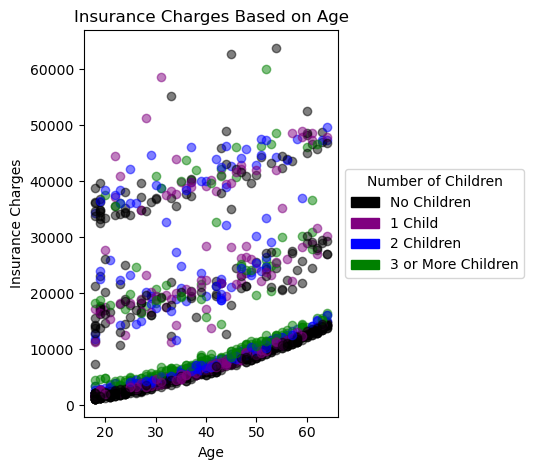

In [57]:
import matplotlib.pyplot as plt 

# Extract ages, charges, and children info from data_list 
ages = [int(person['age']) for person in data_list] 
charges = [float(person['charges']) for person in data_list] 
children = [int(person['children']) for person in data_list] 

# Create a scatter plot with different colors based on the number of children 
for age, charge, num_children in zip(ages, charges, children): 
    if num_children == 0: 
        color = 'black' 
    elif num_children == 1: 
        color = 'purple' 
    elif num_children == 2: 
        color = 'blue' 
    else: color = 'green' 
        
    plt.scatter(age, charge, color=color, alpha=0.5) 
    
# Add titles and labels 
plt.title('Insurance Charges Based on Age') 
plt.xlabel('Age') 
plt.ylabel('Insurance Charges')

# Create custom legends 
import matplotlib.patches as mpatches 
legend_elements = [ 
    mpatches.Patch(color='black', label='No Children'), 
    mpatches.Patch(color='purple', label='1 Child'), 
    mpatches.Patch(color='blue', label='2 Children'), 
    mpatches.Patch(color='green', label='3 or More Children') ] 

# Add the legend to the side of the plot 
plt.legend(handles=legend_elements, title='Number of Children', loc='center left', bbox_to_anchor=(1, 0.5)) 

# Adjust layout to make space for the legend 
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

Calculate the average cost of health insurance for males versus females in this data set.

The average cost of health insurance for males is: $13956.75
The average cost of health insurance for females is: $12569.58


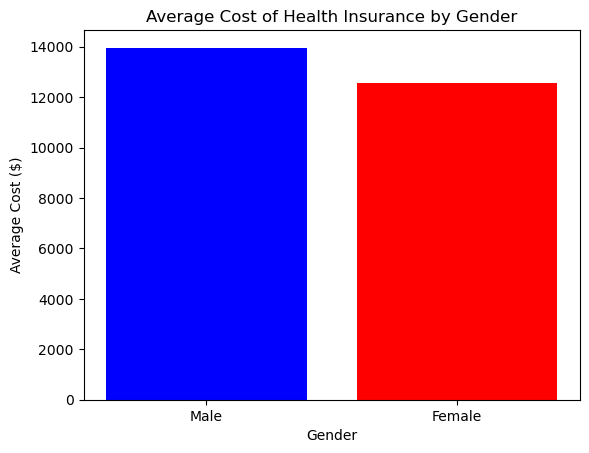

In [63]:
import matplotlib.pyplot as plt

# Extract charges and sex from data_list
male_charges = [float(person['charges']) for person in data_list if person['sex'] == 'male']
female_charges = [float(person['charges']) for person in data_list if person['sex'] == 'female']

# Calculate the average cost of health insurance for males
average_male_charges = sum(male_charges) / len(male_charges)
print(f'The average cost of health insurance for males is: ${average_male_charges:.2f}')

# Calculate the average cost of health insurance for females
average_female_charges = sum(female_charges) / len(female_charges)
print(f'The average cost of health insurance for females is: ${average_female_charges:.2f}')

# Create a bar plot 
labels = ['Male', 'Female'] 
averages = [average_male_charges, average_female_charges] 
colors = ['blue', 'red'] 
plt.bar(labels, averages, color=colors) 

# Add titles and labels 
plt.title('Average Cost of Health Insurance by Gender') 
plt.xlabel('Gender') 
plt.ylabel('Average Cost ($)') 

# Show the plot 
plt.show()

Create visuals for the cost of health insurance for men versus women based on whether they have no children or based on the number of children they do have. 

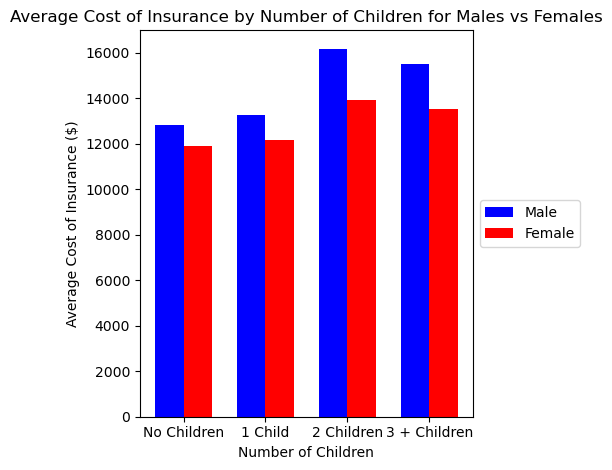

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_average_cost(data_list, gender, num_children):
    filtered_charges = [
        float(person['charges']) for person in data_list 
        if person['sex'] == gender and int(person['children']) == num_children
    ]
    return sum(filtered_charges) / len(filtered_charges) if filtered_charges else 0

def calculate_average_cost_more_than_three(data_list, gender):
    filtered_charges = [
        float(person['charges']) for person in data_list 
        if person['sex'] == gender and int(person['children']) >= 3
    ]
    return sum(filtered_charges) / len(filtered_charges) if filtered_charges else 0

# Average costs for different categories
categories = {
    'No Children': 0,
    '1 Child': 1,
    '2 Children': 2,
    '3 + Children': 3
}

male_costs = [calculate_average_cost(data_list, 'male', categories[label]) if label != '3 + Children' else calculate_average_cost_more_than_three(data_list, 'male') for label in categories]
female_costs = [calculate_average_cost(data_list, 'female', categories[label]) if label != '3 + Children' else calculate_average_cost_more_than_three(data_list, 'female') for label in categories]

# Plotting for males
fig, ax = plt.subplots()
labels = list(categories.keys())
x = np.arange(len(labels))
width = 0.35  # Bar width

rects1 = ax.bar(x - width/2, male_costs, width, label='Male', color='blue')
rects2 = ax.bar(x + width/2, female_costs, width, label='Female', color='red')

# Add titles and labels
ax.set_xlabel('Number of Children')
ax.set_ylabel('Average Cost of Insurance ($)')
ax.set_title('Average Cost of Insurance by Number of Children for Males vs Females')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

Calculate the cost of health insurance for adults with no children, one child, two children, and three or more children.  Then show the incremental differences to the cost of health insurance based on number of children.

In [79]:
# Calculate the average cost for each specific number of children and for 3 or more children
def calculate_average_cost(data_list, num_children):
    filtered_charges = [
        float(person['charges']) for person in data_list 
        if int(person['children']) == num_children
    ]
    return sum(filtered_charges) / len(filtered_charges) if filtered_charges else 0

# Calculate the average cost for each specific number of children
average_costs_by_children = [calculate_average_cost(data_list, i) for i in range(3)]

# Calculate the average cost for 3 or more children separately
charges_for_three_or_more_children = [
    float(person['charges']) for person in data_list if int(person['children']) >= 3
]
average_costs_by_children.append(
    sum(charges_for_three_or_more_children) / len(charges_for_three_or_more_children) if charges_for_three_or_more_children else 0
)

# Print average costs
labels = ['0 children', '1 child', '2 children', '3 or more children']
for label, cost in zip(labels, average_costs_by_children):
    print(f'Average cost for {label}: ${cost:.2f}')

# Calculate the incremental changes
incremental_changes = [
    average_costs_by_children[i] - average_costs_by_children[i - 1] 
    for i in range(1, len(average_costs_by_children))
]

# Print incremental changes
for i, change in enumerate(incremental_changes, start=1):
    print(f'Incremental change from {labels[i-1]} to {labels[i]}: ${change:.2f}')


Average cost for 0 children: $12365.98
Average cost for 1 child: $12731.17
Average cost for 2 children: $15073.56
Average cost for 3 or more children: $14576.00
Incremental change from 0 children to 1 child: $365.20
Incremental change from 1 child to 2 children: $2342.39
Incremental change from 2 children to 3 or more children: $-497.56


In [ ]:
Are the smokers in this data set mostly people who have no children, or does this data show that people with children are more likely to be smokers?

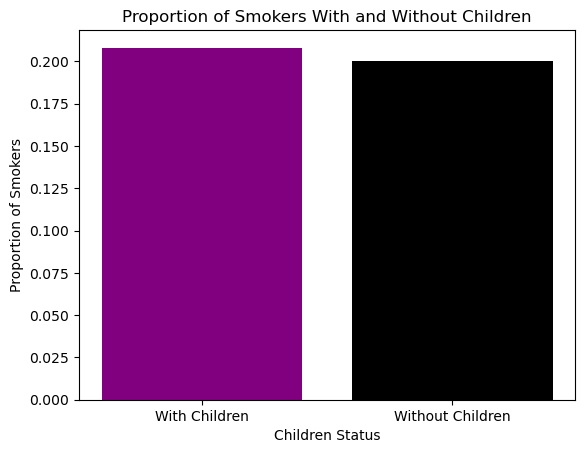

In [81]:
import matplotlib.pyplot as plt

# Count smokers and non-smokers based on having children or not
smokers_with_children = sum(1 for person in data_list if person['smoker'] == 'yes' and int(person['children']) > 0)
non_smokers_with_children = sum(1 for person in data_list if person['smoker'] == 'no' and int(person['children']) > 0)

smokers_without_children = sum(1 for person in data_list if person['smoker'] == 'yes' and int(person['children']) == 0)
non_smokers_without_children = sum(1 for person in data_list if person['smoker'] == 'no' and int(person['children']) == 0)

# Calculate proportions
total_with_children = smokers_with_children + non_smokers_with_children
total_without_children = smokers_without_children + non_smokers_without_children

smokers_with_children_proportion = smokers_with_children / total_with_children
smokers_without_children_proportion = smokers_without_children / total_without_children

# Create the bar chart
labels = ['With Children', 'Without Children']
proportions = [smokers_with_children_proportion, smokers_without_children_proportion]
colors = ['purple', 'black']

plt.bar(labels, proportions, color=colors)

# Add titles and labels
plt.title('Proportion of Smokers With and Without Children')
plt.xlabel('Children Status')
plt.ylabel('Proportion of Smokers')

# Show the plot
plt.show()

How much does the cost of being a smoker raise the cost of someone's health insurance according to this data set?

In [ ]:
Does health insurance cost more in different regions of the country?

In [ ]:
If we filter the data to only look at the non-parent adults in this dataset who are paying for health insurance, what is the financial impact of a lower versus smaller bmi in terms of cost?  What is their average bmi?

In [ ]:
If we filter out all of the non-parent-adults and look only at the adults who are parents, what is their average bmi, and what impact does that have on the cost of their health insurance?

If we pick one male and one female at random from this dataset (who is within a ten year range from the average age of the people represented in this dataset), and let's say they went on a "health-kick" and lost ten percent of their bmi each.  What impact would that have on the cost of their health insurance?

Looking outward to other factors to consider:  For each region in the country represented in this dataset, what is the average annual income per individual?  What is the percentage people then spend on health insurance each year in comparison to their annual income?

The average cost of health insurance for smokers is: $32050.23
The average cost of health insurance for non-smokers is: $8434.27
The difference in cost is: $1583.97


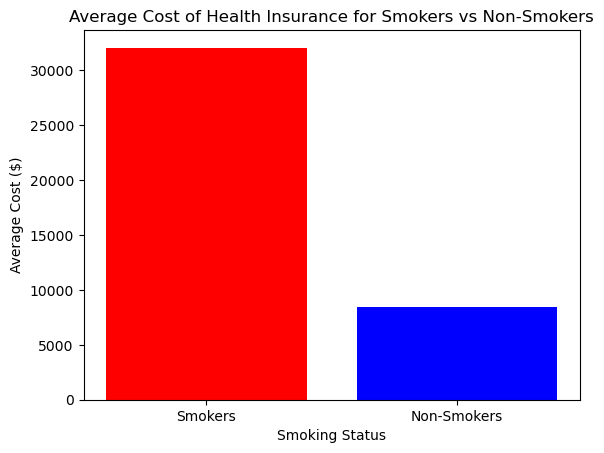

In [86]:
import matplotlib.pyplot as plt 

# Calculate average insurance cost for smokers and non-smokers 
smoker_charges = [float(person['charges']) for person in data_list if person['smoker'] == 'yes'] 
non_smoker_charges = [float(person['charges']) for person in data_list if person['smoker'] == 'no'] 

average_smoker_charges = sum(smoker_charges) / len(smoker_charges) 
average_non_smoker_charges = sum(non_smoker_charges) / len(non_smoker_charges) 

# Print the results 
print(f'The average cost of health insurance for smokers is: ${average_smoker_charges:.2f}') 
print(f'The average cost of health insurance for non-smokers is: ${average_non_smoker_charges:.2f}') 
print(f'The difference in cost is: ${cost_difference:.2f}')

# Create a bar chart 
labels = ['Smokers', 'Non-Smokers'] 
averages = [average_smoker_charges, average_non_smoker_charges] 
colors = ['red', 'blue'] 
plt.bar(labels, averages, color=colors) 

# Add titles and labels 
plt.title('Average Cost of Health Insurance for Smokers vs Non-Smokers') 
plt.xlabel('Smoking Status') 
plt.ylabel('Average Cost ($)') 

# Show the plot 
plt.show()

Is being a smoker typically more or less common in different regions based on the data in insurance.csv?

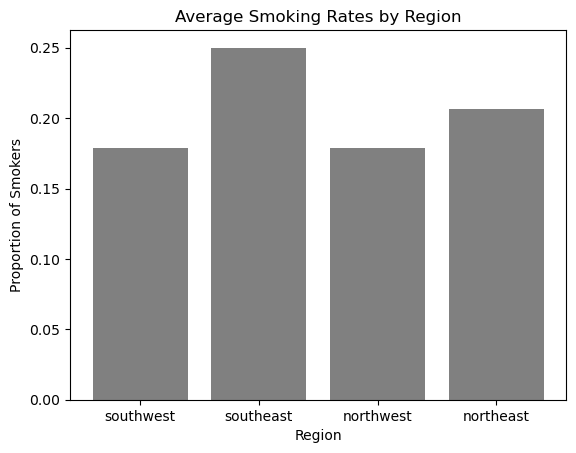

In [88]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Dictionary to hold smoker counts and total counts per region
region_smoker_counts = defaultdict(lambda: {'smokers': 0, 'total': 0})

# Populate the dictionary with data from data_list
for person in data_list:
    region = person['region']
    region_smoker_counts[region]['total'] += 1
    if person['smoker'] == 'yes':
        region_smoker_counts[region]['smokers'] += 1

# Calculate smoking rates per region
regions = list(region_smoker_counts.keys())
smoking_rates = [
    region_smoker_counts[region]['smokers'] / region_smoker_counts[region]['total']
    for region in regions
]

# Create a bar chart
plt.bar(regions, smoking_rates, color='grey')

# Add titles and labels
plt.title('Average Smoking Rates by Region')
plt.xlabel('Region')
plt.ylabel('Proportion of Smokers')

# Show the plot
plt.show()

Now, same chart, but broken down by gender as well...

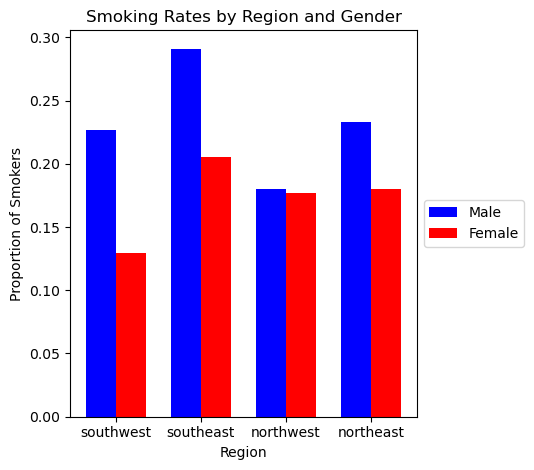

In [90]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Dictionary to hold smoker counts and total counts per region and gender
region_gender_smoker_counts = defaultdict(lambda: {'male': {'smokers': 0, 'total': 0}, 'female': {'smokers': 0, 'total': 0}})

# Populate the dictionary with data from data_list
for person in data_list:
    region = person['region']
    gender = person['sex']
    region_gender_smoker_counts[region][gender]['total'] += 1
    if person['smoker'] == 'yes':
        region_gender_smoker_counts[region][gender]['smokers'] += 1

# Calculate smoking rates per region and gender
regions = list(region_gender_smoker_counts.keys())
male_smoking_rates = [
    region_gender_smoker_counts[region]['male']['smokers'] / region_gender_smoker_counts[region]['male']['total']
    for region in regions
]
female_smoking_rates = [
    region_gender_smoker_counts[region]['female']['smokers'] / region_gender_smoker_counts[region]['female']['total']
    for region in regions
]

# Create a grouped bar chart
x = range(len(regions))
width = 0.35  # Bar width

fig, ax = plt.subplots()
bars_male = ax.bar(x, male_smoking_rates, width, label='Male', color='blue')
bars_female = ax.bar([p + width for p in x], female_smoking_rates, width, label='Female', color='red')

# Add titles and labels
ax.set_title('Smoking Rates by Region and Gender')
ax.set_xlabel('Region')
ax.set_ylabel('Proportion of Smokers')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(regions)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

BMI Based on Gender:

Average BMI for males: 30.94
Average BMI for females: 30.38


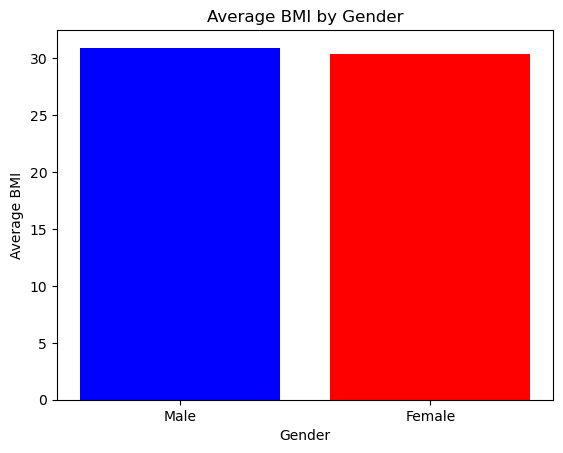

In [92]:
import matplotlib.pyplot as plt

# Extract BMI values based on gender
male_bmi = [float(person['bmi']) for person in data_list if person['sex'] == 'male']
female_bmi = [float(person['bmi']) for person in data_list if person['sex'] == 'female']

# Calculate average BMI
average_male_bmi = sum(male_bmi) / len(male_bmi)
average_female_bmi = sum(female_bmi) / len(female_bmi)

# Print the average BMIs
print(f'Average BMI for males: {average_male_bmi:.2f}')
print(f'Average BMI for females: {average_female_bmi:.2f}')

# Create bar chart for BMI based on gender
labels = ['Male', 'Female']
averages = [average_male_bmi, average_female_bmi]
colors = ['blue', 'red']

plt.bar(labels, averages, color=colors)
plt.title('Average BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('Average BMI')
plt.show()


BMI Based on Number of Children:

Average BMI for 0 children: 30.55
Average BMI for 1 children: 30.62
Average BMI for 3 children: 30.68
Average BMI for 2 children: 30.98
Average BMI for 5 children: 29.61
Average BMI for 4 children: 31.39


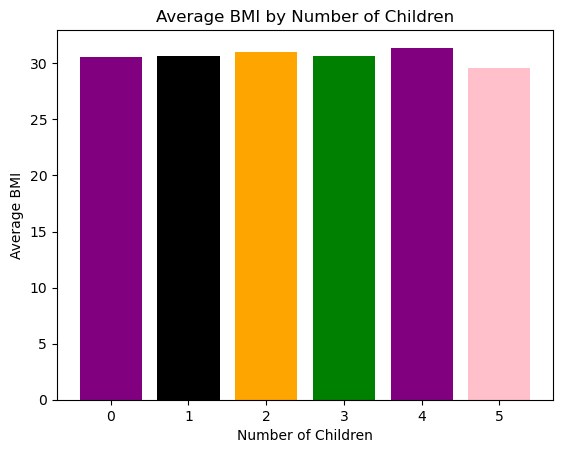

In [94]:
# Calculate average BMI based on number of children
bmi_by_children = defaultdict(list)
for person in data_list:
    num_children = int(person['children'])
    bmi_by_children[num_children].append(float(person['bmi']))

average_bmi_by_children = {children: sum(bmis) / len(bmis) for children, bmis in bmi_by_children.items()}

# Print the average BMIs
for children, average_bmi in average_bmi_by_children.items():
    print(f'Average BMI for {children} children: {average_bmi:.2f}')

# Create bar chart for BMI based on number of children
labels = list(average_bmi_by_children.keys())
averages = list(average_bmi_by_children.values())
colors = ['purple', 'black', 'green', 'orange', 'pink'][:len(labels)]

plt.bar(labels, averages, color=colors)
plt.title('Average BMI by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average BMI')
plt.show()


In [ ]:
BMI Based on Smoker Status:

Average BMI for smokers: 30.71
Average BMI for non-smokers: 30.65


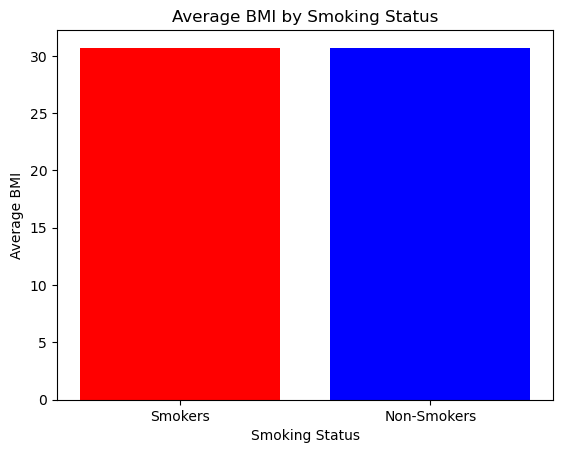

In [96]:
# Extract BMI values based on smoker status
smoker_bmi = [float(person['bmi']) for person in data_list if person['smoker'] == 'yes']
non_smoker_bmi = [float(person['bmi']) for person in data_list if person['smoker'] == 'no']

# Calculate average BMI
average_smoker_bmi = sum(smoker_bmi) / len(smoker_bmi)
average_non_smoker_bmi = sum(non_smoker_bmi) / len(non_smoker_bmi)

# Print the average BMIs
print(f'Average BMI for smokers: {average_smoker_bmi:.2f}')
print(f'Average BMI for non-smokers: {average_non_smoker_bmi:.2f}')

# Create bar chart for BMI based on smoker status
labels = ['Smokers', 'Non-Smokers']
averages = [average_smoker_bmi, average_non_smoker_bmi]
colors = ['red', 'blue']

plt.bar(labels, averages, color=colors)
plt.title('Average BMI by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Average BMI')
plt.show()


BMI Based on Region:

Average BMI for region southwest: 30.60
Average BMI for region southeast: 33.36
Average BMI for region northwest: 29.20
Average BMI for region northeast: 29.17


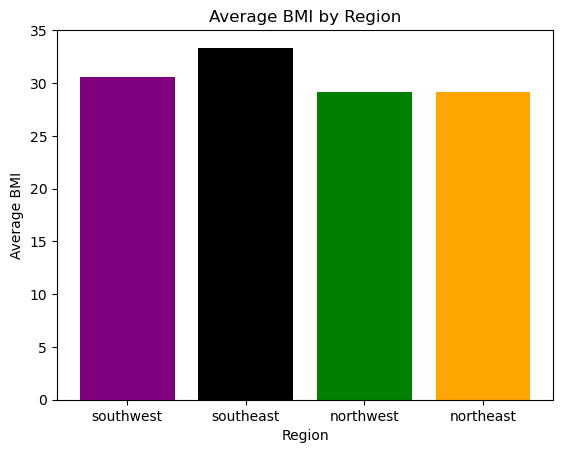

In [98]:
# Calculate average BMI based on region
bmi_by_region = defaultdict(list)
for person in data_list:
    region = person['region']
    bmi_by_region[region].append(float(person['bmi']))

average_bmi_by_region = {region: sum(bmis) / len(bmis) for region, bmis in bmi_by_region.items()}

# Print the average BMIs
for region, average_bmi in average_bmi_by_region.items():
    print(f'Average BMI for region {region}: {average_bmi:.2f}')

# Create bar chart for BMI based on region
labels = list(average_bmi_by_region.keys())
averages = list(average_bmi_by_region.values())
colors = ['purple', 'black', 'green', 'orange', 'pink', 'cyan'][:len(labels)]

plt.bar(labels, averages, color=colors)
plt.title('Average BMI by Region')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.show()


Here's a story about five people who are smokers and have a BMI above 30, who would love to save some money on their annual health insurance costs...   

In [101]:
import random

# Filter data_list to get smokers with BMI > 30
qualified_people = [person for person in data_list if person['smoker'] == 'yes' and float(person['bmi']) > 30]

# Randomly select five people from the qualified list
random_people = random.sample(qualified_people, 5)

# Calculate the potential savings
for person in random_people:
    initial_bmi = float(person['bmi'])
    new_bmi = initial_bmi * 0.9  # Assuming they lose 10% of their BMI
    initial_charges = float(person['charges'])

    # Let's assume for simplicity that the cost of health insurance decreases linearly with BMI reduction
    bmi_savings_factor = 0.1  # This is an assumption
    savings = initial_charges * bmi_savings_factor

    print(f"Person {random_people.index(person) + 1}:")
    print(f"Initial BMI: {initial_bmi:.2f}, New BMI: {new_bmi:.2f}")
    print(f"Initial Annual Health Insurance Cost: ${initial_charges:.2f}")
    print(f"Expected Savings after quitting smoking and losing 10% of BMI: ${savings:.2f}")
    print()

# Alternatively, this can also be represented as a story
story_template = """
Person {index} was a smoker with an initial BMI of {initial_bmi:.2f}. With an annual health insurance cost of ${initial_charges:.2f}, 
they decided to make a positive change. After quitting smoking and reducing their BMI by 10%, their new BMI became {new_bmi:.2f}. 
This healthy transformation resulted in expected savings of ${savings:.2f} on their annual health insurance!
"""

for i, person in enumerate(random_people):
    initial_bmi = float(person['bmi'])
    new_bmi = initial_bmi * 0.9
    initial_charges = float(person['charges'])
    bmi_savings_factor = 0.1
    savings = initial_charges * bmi_savings_factor

    print(story_template.format(index=i+1, initial_bmi=initial_bmi, new_bmi=new_bmi, initial_charges=initial_charges, savings=savings))


Person 1:
Initial BMI: 34.20, New BMI: 30.78
Initial Annual Health Insurance Cost: $39047.29
Expected Savings after quitting smoking and losing 10% of BMI: $3904.73

Person 2:
Initial BMI: 38.17, New BMI: 34.35
Initial Annual Health Insurance Cost: $36307.80
Expected Savings after quitting smoking and losing 10% of BMI: $3630.78

Person 3:
Initial BMI: 36.30, New BMI: 32.67
Initial Annual Health Insurance Cost: $47403.88
Expected Savings after quitting smoking and losing 10% of BMI: $4740.39

Person 4:
Initial BMI: 35.09, New BMI: 31.58
Initial Annual Health Insurance Cost: $47055.53
Expected Savings after quitting smoking and losing 10% of BMI: $4705.55

Person 5:
Initial BMI: 34.40, New BMI: 30.96
Initial Annual Health Insurance Cost: $36197.70
Expected Savings after quitting smoking and losing 10% of BMI: $3619.77


Person 1 was a smoker with an initial BMI of 34.20. With an annual health insurance cost of $39047.29, 
they decided to make a positive change. After quitting smoking an

Let's check the average annual health insurance cost for people in different regions in this data set based on the the qualifications of being a non-smoker and having a BMI of less than 25%.

Average insurance cost for non-smokers with BMI < 25 in northwest: $7596.44
Average insurance cost for non-smokers with BMI < 25 in southwest: $5635.22
Average insurance cost for non-smokers with BMI < 25 in northeast: $8161.61
Average insurance cost for non-smokers with BMI < 25 in southeast: $8947.53


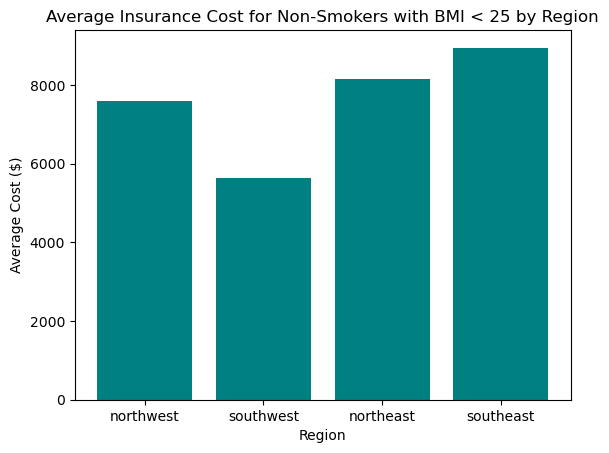

In [103]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Dictionary to hold insurance charges per region for non-smokers with BMI < 25
region_charges = defaultdict(list)

# Populate the dictionary with data from data_list
for person in data_list:
    if person['smoker'] == 'no' and float(person['bmi']) < 25:
        region = person['region']
        region_charges[region].append(float(person['charges']))

# Calculate average insurance charges per region
average_charges_by_region = {region: sum(charges) / len(charges) for region, charges in region_charges.items()}

# Print the average charges
for region, average_charge in average_charges_by_region.items():
    print(f'Average insurance cost for non-smokers with BMI < 25 in {region}: ${average_charge:.2f}')

# Create a bar chart
regions = list(average_charges_by_region.keys())
average_charges = list(average_charges_by_region.values())

plt.bar(regions, average_charges, color='teal')

# Add titles and labels
plt.title('Average Insurance Cost for Non-Smokers with BMI < 25 by Region')
plt.xlabel('Region')
plt.ylabel('Average Cost ($)')

# Show the plot
plt.show()


Number of Children Based on Region:

Average number of children in southwest: 1.14
Average number of children in southeast: 1.05
Average number of children in northwest: 1.15
Average number of children in northeast: 1.05


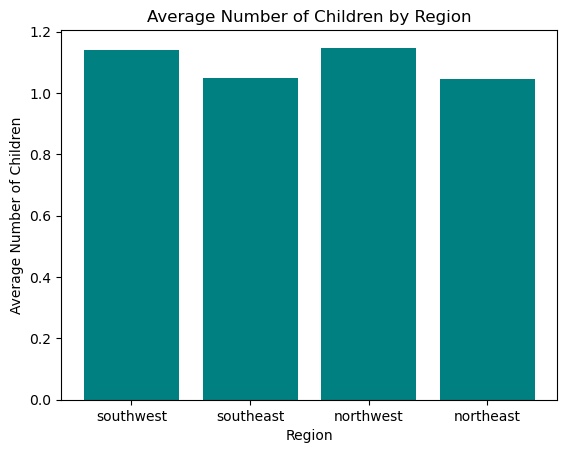

In [105]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Dictionary to hold the number of children per region
region_children = defaultdict(list)

# Populate the dictionary with data from data_list
for person in data_list:
    region = person['region']
    region_children[region].append(int(person['children']))

# Calculate the average number of children per region
average_children_by_region = {region: sum(children) / len(children) for region, children in region_children.items()}

# Print the average number of children
for region, average_children in average_children_by_region.items():
    print(f'Average number of children in {region}: {average_children:.2f}')

# Create a bar chart
regions = list(average_children_by_region.keys())
average_children = list(average_children_by_region.values())

plt.bar(regions, average_children, color='teal')

# Add titles and labels
plt.title('Average Number of Children by Region')
plt.xlabel('Region')
plt.ylabel('Average Number of Children')

# Show the plot
plt.show()
